# Prueba de Simulacion de Eventos Discretos

#### Nombre : Jonathan Atancuri
# Objetivo:

* Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones basados en eventos discretos.

# Introducción:

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes posteriores a las elecciones presidenciales son la re activación de los pequeños comercios y/o centros educativos. Para ello se plantea realizar  un modelo de simulación de eventos discretos que permita determinar cual son los principales factores para la re activación de la educación en el ingreso a las aulas de los estudiantes[1].

# Enunciado:

* Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
En base a los datos del siguiente link https://educacion.gob.ec/wp-content/uploads/downloads/2012/08/AZUAY11.pdf, genere una simulación del ingresos de los estudiantes, para ello debemos escoger un establecimiento y en base a los docentes y estudiantes modelar el reingreso de los estudiantes en base a los siguientes datos.
    * Solo se va a tener en cuenta uno de los planteles educativos(Escuela, colegio, universidad dentro del Azuay).
    * Se tiene un promedio que el 90% de los docentes han sido vacunados y pueden realizar el proceso de ingreso en cada uno de los cursos.
    * Dentro del procesos se tiene que alrededor del 5% - 10% de los estudiantes no podrán asistir debido a no presentar la vacuna/enfermedades adyacentes.
    * Los estudiantes solo pertenecen a una sola entidad educativa al igual que los docentes.
    * Se va  a tener un periodo de prueba de un mes, posterior a ello se realiza al azar al 10% de estudiantes una prueba PCR para validar que no estén contagiados.
    * De la ultima el 2% de los estudiantes dan positivo por lo que se cierra el curso completo.
    * Los estudiantes asisten cada semana y estos están en un horario de 6 horas ya sea diurno o nocturno.
    * Tienen un receso 30 minutos dentro del establecimiento en donde se concentran todos los estudiantes y exite un foco de contagio del 2%.
 
* El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
    * Generar un cuaderno de Python para el desarrollo y parametrización de graficas, reportes, y animación (Simpy).
    * Generar una animación en 2D/3D del modelo propuesto.
    * Obtener los siguientes análisis:
        * Cuantos contagiados tengo al final del mes.
        * Cuantos cursos debo cerrar.
        * Cuantos estudiantes y docentes ingresan y salen al final del mes.


# UNIDAD EDUCATIVA BILINGUE INTERAMERICANA

* Docentes Mujeres: 4
* Docentes Hombres: 7
* Total Docentes: 11
* Administrativos Femenino: 1
* Administrativos Masculino: 0
* Total Administrativos: 1
* Estudiantes Femenino: 73
* Estudiantes Masculino: 74
* Total Estudiantes: 147

In [1]:
#Importación de librerías
import matplotlib.pyplot as plt
import simpy
import random as rand
import datetime 
from statistics import mean
import math

#Nueva libreria para graficas
import seaborn as sns
import pygal

print('Importadas')

Importadas


In [3]:
%matplotlib inline

#Unidad Educativa Biligue Interamericana 
#Total docentes 11  , 7 hombres , 4 mujeres
# 90% ---> 10 docentes vacunados 
# Alumnos matriculados 147
# 15 Alumnos no podran asistir de 147 ---> 5-10%
#Periodo Prueba 30 dias -- > DIAS DE SIMULACION
# 10% PCR estudiantes random de 132 alumnos restantes
# 2% positivo 3 personas dan positivos de 132
# Tiempo total de  clases 6 horas -->  360 MINUTOS
# Tiempo de receso 30 minutos



# Total docentes = 11
DOCENTES = 11

# Total estudiantes = 147
ESTUDIANTES = 147

#Personal a cargo de la prueba PCR
PERSONAL_PCR = 5

# Total de cursos = numEstudiantes / numDocentes
CURSOS = math.ceil(ESTUDIANTES/DOCENTES)

# Se tiene un promedio que el 90% de los docentes han sido vacunados
TOTAL_DOCENTES = int(DOCENTES*0.9)

#Dentro del procesos se tiene que alrededor del 5% - 10% de los estudiantes no podrán asistir debido a no presentar la vacuna/enfermedades.
TOTAL_ESTUDIANTES = int(ESTUDIANTES*0.8)

#Total de estudiantes contagiados en el receso
TOTAL_ESTUDIANTES_CONTAGIADOS = 0

#Periodo de prueba = 1 mes ** Se multiplica las horas de clase por 60 para obtener el total de minutos al dia 
PERIODO_PRUEBA = 30 #dias
TIEMPO_POR_DIA = (6*60)

# Tiempo Prueba PCR
TIEMPO_TOTAL_PRUEBA_PCR = 0

# Tiempo de prueba PCR de cada persona
TIEMPO_PRUEBA_PER_PERS = {}

# Distribución de estudiante por curso
ESTUDIANTE_PER_CURSO = {}

#Tienen un receso 30 minutos dentro del establecimiento 
RECESO_POR_DIA = 30

#Estudiantes PCR.
PRUEBA_PCR = 0

#Estudiantes contagiados
ESTUDIANTES_CONTAGIADOS = 0

#Estudiantes que no entrar a clases por vacuna o enfermedades
ESTUDIANTES_NO_CLASES = 0

TOTAL_PERSONAS = 0

#Cuantos estudiantes ingresan y salen al final del mes.
TOTAL_ESTUDIANTES_FIN_MES = 0

#Cuantos docentes ingresan y salen al final del mes.
TOTAL_DOCENTES_FIN_MES = 0

TIEMPO_SIMULACION = 40000


#Division de horas para los dos periodos de clases teniendo en cuenta que hay 1 recreo de 30 min
periodo1 = int(round(TIEMPO_POR_DIA-RECESO_POR_DIA)/2)
periodo2 = int(round(TIEMPO_POR_DIA-RECESO_POR_DIA)/2)

ESTUDIANTES_BILINGUE = {}

NO_CUMPLE = []
CONTAGIADOS_RECREO = []
ESTUDIANTES_CONTAGIADOS_RECREO = []

ESTUDIANTE_PRUEBA_10 = []


PRUEBA_PCR= []

PRUEBA_PCR_RESULTADO = []

prueba_pcr_preseleccion={}

In [4]:
for i in range(TOTAL_ESTUDIANTES):
    ESTUDIANTES_BILINGUE[i]="NO",i
    
print(ESTUDIANTES_BILINGUE)

{0: ('NO', 0), 1: ('NO', 1), 2: ('NO', 2), 3: ('NO', 3), 4: ('NO', 4), 5: ('NO', 5), 6: ('NO', 6), 7: ('NO', 7), 8: ('NO', 8), 9: ('NO', 9), 10: ('NO', 10), 11: ('NO', 11), 12: ('NO', 12), 13: ('NO', 13), 14: ('NO', 14), 15: ('NO', 15), 16: ('NO', 16), 17: ('NO', 17), 18: ('NO', 18), 19: ('NO', 19), 20: ('NO', 20), 21: ('NO', 21), 22: ('NO', 22), 23: ('NO', 23), 24: ('NO', 24), 25: ('NO', 25), 26: ('NO', 26), 27: ('NO', 27), 28: ('NO', 28), 29: ('NO', 29), 30: ('NO', 30), 31: ('NO', 31), 32: ('NO', 32), 33: ('NO', 33), 34: ('NO', 34), 35: ('NO', 35), 36: ('NO', 36), 37: ('NO', 37), 38: ('NO', 38), 39: ('NO', 39), 40: ('NO', 40), 41: ('NO', 41), 42: ('NO', 42), 43: ('NO', 43), 44: ('NO', 44), 45: ('NO', 45), 46: ('NO', 46), 47: ('NO', 47), 48: ('NO', 48), 49: ('NO', 49), 50: ('NO', 50), 51: ('NO', 51), 52: ('NO', 52), 53: ('NO', 53), 54: ('NO', 54), 55: ('NO', 55), 56: ('NO', 56), 57: ('NO', 57), 58: ('NO', 58), 59: ('NO', 59), 60: ('NO', 60), 61: ('NO', 61), 62: ('NO', 62), 63: ('NO', 

In [5]:
for i in range(TOTAL_ESTUDIANTES):
    ESTUDIANTE_PER_CURSO[i] = i, rand.randint(1,CURSOS)

In [6]:
def regresoClases(env, name, clases, **duration):
    rnd = rand.randint(1,ESTUDIANTES)
    no_entra_clases = 0
    si_entra_clases_uid = []
    if rnd <= 8:
        no_entra_clases+=1
        NO_CUMPLE.append(int(no_entra_clases))
        print(f'{name} No puede entrar a clases, ENFERMO/SIN VACUNA {round(env.now, 2)}')
        
    else:
        with clases.request() as req:
            yield req 
            #1: Entra a clases
            print(f'{name} Entra a clases a las {round(env.now)}')
            yield env.timeout(duration['entra_clases'])
            
            #2: Sale al recreo
            print(f'{name} Sale al recreo a las {round(env.now)}')
            yield env.timeout(duration['sale_recreo'])
            
            for i in range(len(ESTUDIANTES_BILINGUE)):
                contagio_recreo = 0
#                 aux = []
                
                rnd_recreo = rand.randint(1,len(ESTUDIANTES_BILINGUE))            
                if rnd_recreo < math.ceil(len(ESTUDIANTES_BILINGUE)*0.02):
                    
                    estudiante = ESTUDIANTES_BILINGUE[i][1]
            
                    contagio_recreo+=1

                    ESTUDIANTES_CONTAGIADOS_RECREO.append(estudiante)
                    CONTAGIADOS_RECREO.append(int(contagio_recreo))
                    
            #3: Regresa a clases
            print(f'{name} Regresa a clases a las {round(env.now)}')
            yield env.timeout(duration['regresa_clases'])

            #4: Entra a clases
            print(f'{name} Se va a la casa a las {round(env.now)}')
            yield env.timeout(duration['sale_casa'])
   
        #---------------PRUEBA PCR----------------#
        yield env.timeout(duration['pruebaPCR'])
        
        rnd_PCR = rand.randint(1,100)
        pruebaPCR = 0
        if rnd_PCR <= math.ceil(len(ESTUDIANTES_BILINGUE)*0.10):
            print(f'{name} para prueba PCR {round(env.now, 2)}')
            pruebaPCR=+1
            PRUEBA_PCR.append(int(pruebaPCR))
            print('Hasta aqui')
        
            rnd_PCR_SI = rand.randint(1,len(ESTUDIANTES_BILINGUE))
            rnd_resultado_pcr = 0
           
            if rnd_PCR_SI <= math.ceil(len(ESTUDIANTES_BILINGUE)*0.02):
                print('Hasta 1')
                print(f'{name} RESULTADO ** CONTAGIADO {round(env.now, 2)}')
                
                rnd_resultado_pcr=+1
                PRUEBA_PCR_RESULTADO.append(int(rnd_resultado_pcr))

In [7]:
env = simpy.Environment()

# Model restaurant that can only allow 2 customers at once
clases = simpy.Resource(env, capacity=TOTAL_ESTUDIANTES)
durations = {'entra_clases': periodo1, 'sale_recreo': RECESO_POR_DIA, 'regresa_clases': periodo2, 'sale_casa': 2, 'pruebaPCR':30}

#CONTAGIOS POR PRUEBA PCR
a = len(PRUEBA_PCR_RESULTADO)
if a == 0:
    print('NO HUBIERON CONTAGIADOS :) ')
else:
    print('Si hay contagiados,total',PRUEBA_PCR_RESULTADO)
    
#cursos = {}
for i in range(TOTAL_ESTUDIANTES):
    env.process(regresoClases(env, f'Estudiante {i}', clases, **durations))
env.run(until=TIEMPO_SIMULACION)

NO HUBIERON CONTAGIADOS :) 
Estudiante 20 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 32 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 52 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 61 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 80 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 91 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 0 Entra a clases a las 0
Estudiante 1 Entra a clases a las 0
Estudiante 2 Entra a clases a las 0
Estudiante 3 Entra a clases a las 0
Estudiante 4 Entra a clases a las 0
Estudiante 5 Entra a clases a las 0
Estudiante 6 Entra a clases a las 0
Estudiante 7 Entra a clases a las 0
Estudiante 8 Entra a clases a las 0
Estudiante 9 Entra a clases a las 0
Estudiante 10 Entra a clases a las 0
Estudiante 11 Entra a clases a las 0
Estudiante 12 Entra a clases a las 0
Estudiante 13 Entra a clases a las 0
Estudiante 14 Entra a clases a las 0
Estudiante 15 Entra a clases a las 0
Estudiante 16 Entra a cl

In [8]:
mylist = list(set(ESTUDIANTES_CONTAGIADOS_RECREO))

print(len(mylist))

101


In [9]:
print(PRUEBA_PCR_RESULTADO)


[1]


In [10]:
print(PRUEBA_PCR)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Reporte 

In [11]:
print('Total de estudiantes:',ESTUDIANTES)
print('Total de estudiantes que ingresaron a clases:',TOTAL_ESTUDIANTES)
print('Total de estudiantes que no ingresaron a clases:',ESTUDIANTES-TOTAL_ESTUDIANTES)
print('Total de estudiantes que se contagiaron en el recreo:',len(mylist))
print('Personas que salieron positivo en las pruebas PCR:', len(PRUEBA_PCR_RESULTADO))
print('Se deben cerrar', len(PRUEBA_PCR_RESULTADO))

Total de estudiantes: 147
Total de estudiantes que ingresaron a clases: 117
Total de estudiantes que no ingresaron a clases: 30
Total de estudiantes que se contagiaron en el recreo: 101
Personas que salieron positivo en las pruebas PCR: 1
Se deben cerrar 1


# Gráficas representativas de los resultados:

In [13]:
print(ESTUDIANTES_BILINGUE)

{0: ('NO', 0), 1: ('NO', 1), 2: ('NO', 2), 3: ('NO', 3), 4: ('NO', 4), 5: ('NO', 5), 6: ('NO', 6), 7: ('NO', 7), 8: ('NO', 8), 9: ('NO', 9), 10: ('NO', 10), 11: ('NO', 11), 12: ('NO', 12), 13: ('NO', 13), 14: ('NO', 14), 15: ('NO', 15), 16: ('NO', 16), 17: ('NO', 17), 18: ('NO', 18), 19: ('NO', 19), 20: ('NO', 20), 21: ('NO', 21), 22: ('NO', 22), 23: ('NO', 23), 24: ('NO', 24), 25: ('NO', 25), 26: ('NO', 26), 27: ('NO', 27), 28: ('NO', 28), 29: ('NO', 29), 30: ('NO', 30), 31: ('NO', 31), 32: ('NO', 32), 33: ('NO', 33), 34: ('NO', 34), 35: ('NO', 35), 36: ('NO', 36), 37: ('NO', 37), 38: ('NO', 38), 39: ('NO', 39), 40: ('NO', 40), 41: ('NO', 41), 42: ('NO', 42), 43: ('NO', 43), 44: ('NO', 44), 45: ('NO', 45), 46: ('NO', 46), 47: ('NO', 47), 48: ('NO', 48), 49: ('NO', 49), 50: ('NO', 50), 51: ('NO', 51), 52: ('NO', 52), 53: ('NO', 53), 54: ('NO', 54), 55: ('NO', 55), 56: ('NO', 56), 57: ('NO', 57), 58: ('NO', 58), 59: ('NO', 59), 60: ('NO', 60), 61: ('NO', 61), 62: ('NO', 62), 63: ('NO', 

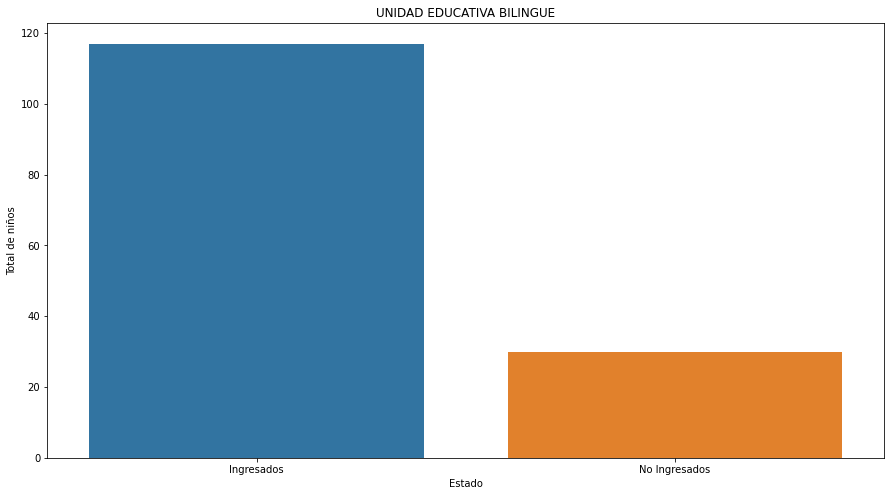

In [23]:
# A continuación se presenta la gráfica representativa de los vacunados vs los no vacunados
fig = plt.figure(figsize=(15,8))
plt.title('UNIDAD EDUCATIVA BILINGUE')
x = ['Ingresados', 'No Ingresados']
y = [TOTAL_ESTUDIANTES, ESTUDIANTES-TOTAL_ESTUDIANTES]
#current_palette = sns.color_palette()
#Seaborn
sns.barplot(x=x, y=y,linewidth=10)
plt.xlabel('Estado')
plt.ylabel('Total de niños')
plt.show()

# Conclusiones
Al ser una institución bastante pequeña es necesario agrandar los porcentajes para poder medir a los estudiantes ya que al no tener tantos estudiantes, Solo se  pudo encontrar un estudiante que da positivo en la prueba PCR, por ende, no se pudo cerrar un curso como tal, por tal motivo es importante ampliar los rangos de porcentaje o tener un tipo de rango de acuerdo al número de población que va a participar en la simulación.
En el presente modelo se ha simulado de manera exitosa una institución pequeña que es una Escuela de educación inicial, la cual se presenta el primer periodo, el recreo, el segundo periodo y después la salida. Algunas instituciones poseen 2 recreos por lo que también es importante hacer un analisis previo para poder simular un evento discreto de ese tipo.


 

# Referencias : 

https://www.salud.gob.ec/plan-nacional-de-vacunacion-ecuador-2021-llega-segundo-lote-de-vacunas-pfizer-por-16-380-dosis/
